In [1]:
pip install pmdarima

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("C:\\Users\\Expert\\Downloads\\revenue_data.csv - revenue_data.csv.csv",parse_dates=["Month"],index_col=["Month"])

In [25]:
df.head()

,Sales
Month,
2015-01-01,27716
2015-02-01,25536
2015-03-01,28896
2015-04-01,33540
2015-05-01,40755


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [27]:
df.isna().sum()

Sales    0
dtype: int64

In [28]:
df.duplicated()

Month
2015-01-01    False
2015-02-01    False
2015-03-01    False
2015-04-01    False
2015-05-01    False
2015-06-01    False
2015-07-01    False
2015-08-01    False
2015-09-01    False
2015-10-01    False
2015-11-01    False
2015-12-01    False
2016-01-01    False
2016-02-01    False
2016-03-01    False
2016-04-01    False
2016-05-01    False
2016-06-01    False
2016-07-01    False
2016-08-01    False
2016-09-01    False
2016-10-01    False
2016-11-01    False
2016-12-01    False
2017-01-01    False
2017-02-01    False
2017-03-01    False
2017-04-01    False
2017-05-01    False
2017-06-01    False
2017-07-01    False
2017-08-01    False
2017-09-01    False
2017-10-01    False
2017-11-01    False
2017-12-01    False
2018-01-01    False
2018-02-01    False
2018-03-01    False
2018-04-01    False
2018-05-01    False
2018-06-01    False
2018-07-01    False
2018-08-01    False
2018-09-01    False
2018-10-01     True
2018-11-01    False
2018-12-01    False
2019-01-01    False
2019-02-01    

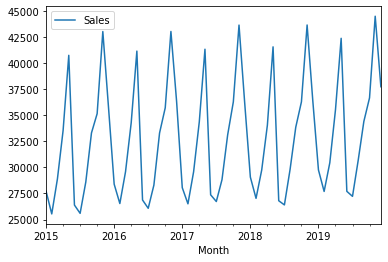

In [29]:
df.plot()

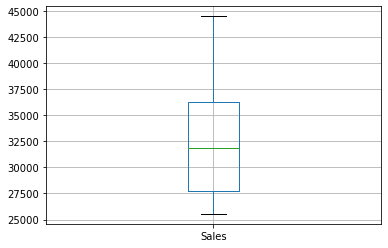

In [30]:
df.boxplot()

#to check stationarity we are using adfuller test method

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
res=adfuller(df)
p_val=res[1]
if p_val>0.05:
    print("not stationary")
else:
    print("stationary")

not stationary


In [33]:
res

(2.12881267632303,
 0.9988186315857313,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 741.2618695961437)

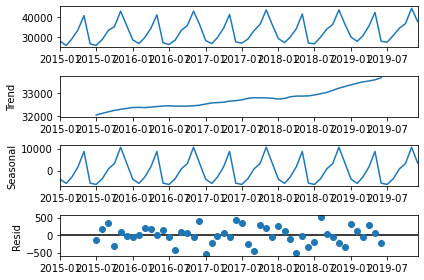

In [34]:
from statsmodels.api import tsa
decomp=tsa.seasonal_decompose(df)
fig=decomp.plot()

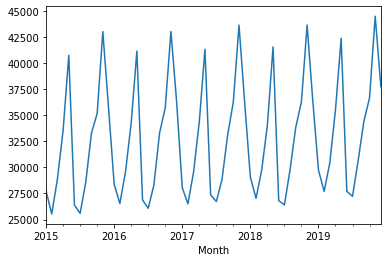

In [35]:
df["Sales"].plot()

In [36]:
from pmdarima import auto_arima

In [37]:
auto_arima=auto_arima(df["Sales"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1184.634, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1209.686, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1203.832, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1200.076, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1421.614, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1196.298, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1205.386, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1193.618, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1184.396, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1192.090, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1167.739, Time=0.42 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=1172.622, Time=0.45 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1182.051, Time=0.43 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : 

In [38]:
x=df["Sales"]

In [39]:
len(x)

60

In [40]:
train_len=int(len(x)*0.8)

In [41]:
train=x.iloc[:train_len]
test=x.iloc[train_len:]

In [42]:
print(train.shape)
print(test.shape)

(48,)
(12,)


In [44]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(train,order=(4,0,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                     ARMA(4, 2)   Log Likelihood                -458.036
Method:                       css-mle   S.D. of innovations           3098.752
Date:                Fri, 02 Jul 2021   AIC                            932.071
Time:                        16:24:23   BIC                            947.041
Sample:                    01-01-2015   HQIC                           937.728
                         - 12-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.247e+04    371.983     87.278      0.000    3.17e+04    3.32e+04
ar.L1.Sales     0.7425      0.210      3.542      0.000       0.332       1.153
ar.L2.Sales    -0.9983      0.178     -5.600      0.000      -1.348      -0.649
ar.L3.Sales     0.0127      0.183      0.069      0.945      -0.347       0.372
ar.L4.Sales    -0.2600      0.234     -1.112      0.266      -0.718       0.198
ma.L1.Sales    -0.7673      0.183     -4.196      0.000      -1.126      -0.409
ma.L2.Sales     1.0000      0.079     12.680      0.000       0.845       1.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5045           -0.8712j            1.0067           -0.1665
AR.2            0.5045           +0.8712j            1.0067            0.1665
AR.3           -0.4800           -1.8878j            1.9479           -0.2896
AR.4           -0.4800           +1.8878j            1.9479            0.2896
MA.1            0.3836           -0.9235j            1.0000           -0.1873
MA.2            0.3836           +0.9235j            1.0000            0.1873
-----------------------------------------------------------------------------
"""

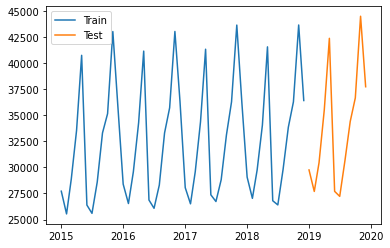

In [45]:
plt.plot(train ,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [46]:
start=len(train)
end=len(x)-1
print(start,end)

48 59


In [47]:
ypred_test=model_fit.predict(start=start,end=end)

In [48]:
ypred_test

2019-01-01    26203.044694
2019-02-01    25945.625188
2019-03-01    31015.210655
2019-04-01    36791.140828
2019-05-01    38671.537140
2019-06-01    34433.112117
2019-07-01    28164.084508
2019-08-01    26262.467561
2019-09-01    30565.954586
2019-10-01    36682.077206
2019-11-01    38533.156600
2019-12-01    34351.135359
Freq: MS, dtype: float64

In [61]:
date_pred=pd.date_range(start="2020-01-01",end="2020-01-12")

In [62]:
date_pred

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
              dtype='datetime64[ns]', freq='D')

In [63]:
ypred_test.index=date_pred

In [64]:
ypred_test

2020-01-01    26203.044694
2020-01-02    25945.625188
2020-01-03    31015.210655
2020-01-04    36791.140828
2020-01-05    38671.537140
2020-01-06    34433.112117
2020-01-07    28164.084508
2020-01-08    26262.467561
2020-01-09    30565.954586
2020-01-10    36682.077206
2020-01-11    38533.156600
2020-01-12    34351.135359
Freq: D, dtype: float64

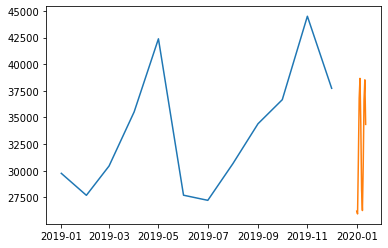

In [65]:
plt.plot(test)
plt.plot(ypred_test)

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(test,ypred_test)
mae=mean_absolute_error(test,ypred_test)
print("MSE is ",mse)
print("RMSE is ",np.sqrt(mse))
print("MAE is",mae)

MSE is  13244793.150389308
RMSE is  3639.33965856298
MAE is 3012.392015453348
